In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize



In [2]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [41]:
clust = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

<Axes: xlabel='x', ylabel='y'>

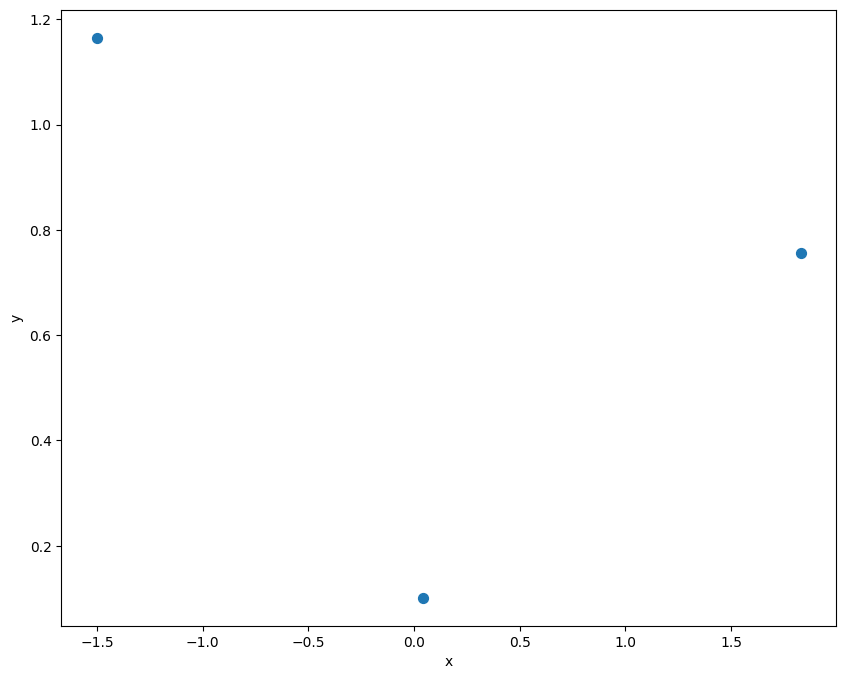

In [28]:


# Sample data (replace this with your data)
data = sympdf.values


# Choose a subsample size
subsample_size = 100

# Randomly select a subset of data for embedding
subsample_indices = np.random.choice(len(data), size=subsample_size, replace=False)
subsample_data = data[subsample_indices]

# Calculate pairwise Hamming distances for the subsample
hamming_distances_subsample = np.zeros((subsample_size, subsample_size))
for i in range(subsample_size):
    for j in range(subsample_size):
        hamming_distances_subsample[i, j] = np.sum(subsample_data[i] != subsample_data[j])

# Initial random embedding for the subsample
embedding_matrix_subsample = np.random.rand(subsample_size, 2)

# Define the objective function to minimize for the subsample
def objective_subsample(x):
    distances = np.zeros((subsample_size, subsample_size))
    for i in range(subsample_size):
        for j in range(subsample_size):
            distances[i, j] = np.linalg.norm(x[i] - x[j])
    return np.sum((distances - hamming_distances_subsample)**2)

# Optimize the embedding for the subsample
result_subsample = minimize(objective_subsample, embedding_matrix_subsample.flatten(), method='L-BFGS-B')
optimized_embedding_subsample = result_subsample.x.reshape(subsample_size, 2)

# Project the remaining points into the same space
def project_to_embedding(x):
    distances = np.zeros(subsample_size)
    for i in range(subsample_size):
        distances[i] = np.sum(x != subsample_data[i])
    return distances

# Project all points into the 2D space
projected_points = np.zeros((len(data), 2))
for i in range(len(data)):
    distances = project_to_embedding(data[i])
    # Use the distances to determine the coordinates in the 2D space
    projected_points[i] = optimized_embedding_subsample[np.argmin(distances)]

# Visualize the results
print("Optimized Embedding (Subsample):")
print(optimized_embedding_subsample)
print("\nProjected Points:")
print(projected_points)



Optimized Embedding (Subsample):
[[-1.93686836e+01 -2.62884180e+00]
 [-6.03488261e+01  1.85913904e+01]
 [-2.38886793e+01 -3.58488285e+01]
 [ 4.05114596e+01 -1.60485905e+01]
 [-3.17289007e+01 -1.34288353e+01]
 [-1.40886838e+01 -4.14487785e+01]
 [ 1.00513075e+01  6.44911596e+01]
 [ 4.90115669e+01  2.18708487e+01]
 [-1.68887897e+01  7.57140445e+00]
 [ 3.81714176e+01 -1.02485953e+01]
 [-5.70861066e+00 -1.06288533e+01]
 [ 7.32513875e+01 -8.58893514e+00]
 [-1.31487559e+01 -2.73287867e+01]
 [-5.11088131e+01 -3.34877712e+00]
 [ 5.18713047e+01  1.02310873e+01]
 [-1.12688652e+01  6.65112867e+00]
 [ 5.15146627e+00  3.45314115e+01]
 [-7.20838034e+00  7.35133068e+00]
 [-2.51085187e+01 -1.73888177e+01]
 [ 3.17913374e+01  1.92712129e+01]
 [ 1.77911314e+01 -1.04855784e+00]
 [ 3.69712554e+01  5.47714806e+01]
 [-4.50287323e+01 -7.55288227e+01]
 [ 5.06912838e+01 -6.40907082e+00]
 [-2.12886822e+01  3.32711823e+01]
 [ 2.81912983e+01 -9.82860421e+00]
 [-4.86859804e+00  4.49107204e+01]
 [ 3.31104788e-01 -2.0

In [32]:
optimized_embedding = pd.DataFrame(projected_points, columns=['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

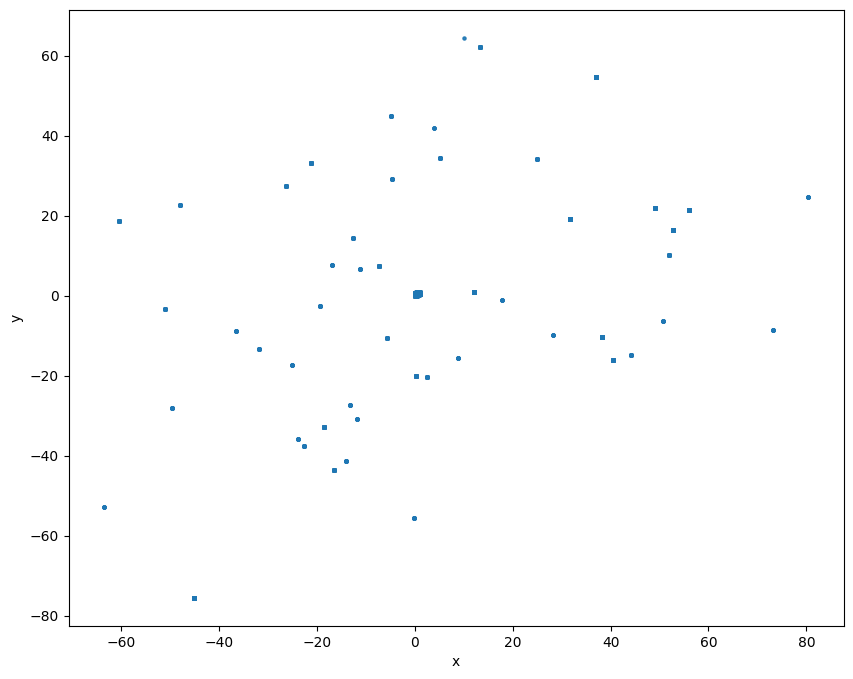

In [33]:
optimized_embedding.plot.scatter(x='x', y='y', s=5, alpha=.9, figsize=(10, 8))

<Axes: ylabel='Frequency'>

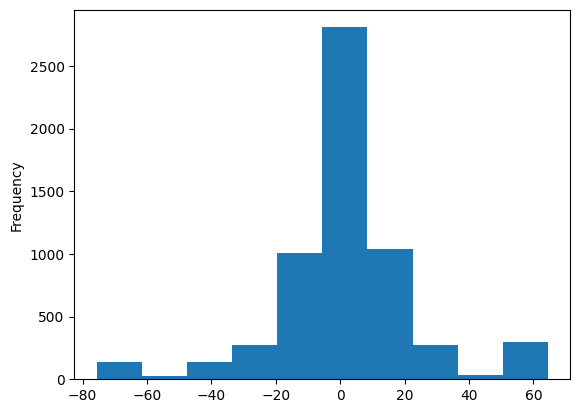

In [34]:
optimized_embedding['y'].plot.hist()

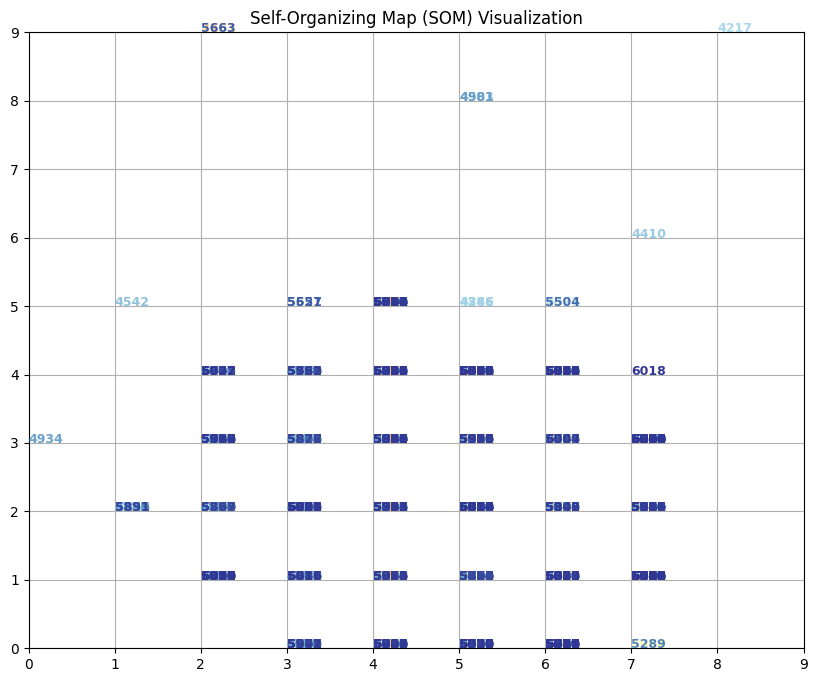

In [52]:


# Assuming 'data' is your binary data of shape (6031, 162)
data_shape = data.shape

# Flatten the data to be compatible with MiniSom
flat_data = data.reshape((data_shape[0], -1))

# Define SOM parameters
som_grid_size = 10  # Adjust grid size based on your preference
som_iterations = 1000  # You may adjust the number of iterations

# Create and train the SOM
som = MiniSom(som_grid_size, som_grid_size, flat_data.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(flat_data, som_iterations)

# Get the coordinates of each data point on the SOM grid
mapped_data = np.array([som.winner(x) for x in flat_data])

# Visualization
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(mapped_data):
    plt.text(x, y, str(i), color=plt.cm.RdYlBu(i / len(mapped_data)), fontdict={'weight': 'bold', 'size': 9})

plt.title('Self-Organizing Map (SOM) Visualization')
plt.xticks(np.arange(0, som_grid_size, 1))
plt.yticks(np.arange(0, som_grid_size, 1))
plt.grid()
plt.show()


In [51]:
clust.shape

(6031, 1)

In [46]:
clust['x'] = embedded_data[:,0]
clust['y'] = embedded_data[:,1]

ValueError: Length of values (100) does not match length of index (6031)

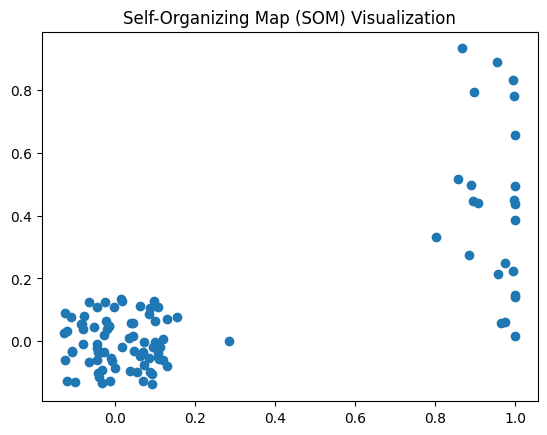

KeyError: 'x'

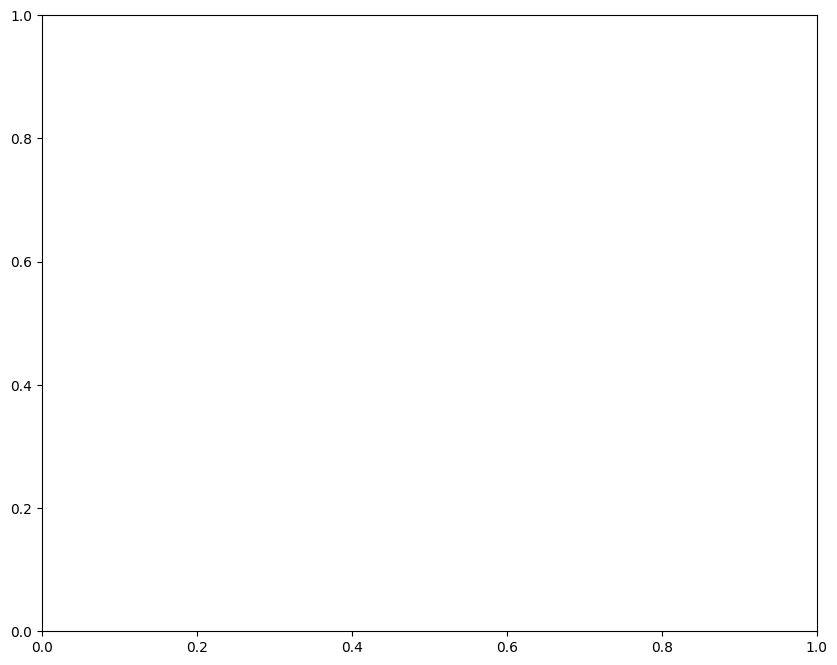

In [47]:
plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
plt.title('Self-Organizing Map (SOM) Visualization')
plt.show()

# color by clust 
clust.plot.scatter(x='x', y='y', c='clust', colormap='viridis', figsize=(10, 8))
